In [1]:
#===========================================
# import modules, defs and variables
#===========================================
# exec(open("./QqQ-MRM-MSI-generator-external.py").read())
exec(open("./QqQ-MRM-MSI-generator-def.py").read())

print('Finish modules, defs and variables import, next step: check the dimensionality of this MSI data set.')

Finish modules, defs and variables import, next step: check the dimensionality of this MSI data set.


### configuration

In [3]:
# specify raw file dir
# NameBody is the file path with the file extension and line number removed 
NameBody = "./QqQ-raw-files/WorklistData-00"  # edit
# File extension of the raw data files
NamePost = ".d"                                                          # edit

# Should be an excel file with a single column of m/z values with a header
MassList_dir = "./QqQ-raw-files/Makeshift masses.xlsx"

# Location you want to save your images to
OutputDir = "./2023.04.28 PC-MT trail2"

# polarity of the data ('+' or '-')
polarity = '+'

# mass window (ppm) 
MassTolerance = 10

### data pre-processing

In [5]:
# Get list of lines to use
LineList = Get_LineList(NameBody, NamePost)

# Load Mass List for MS1 ion signals
MassList = np.asarray(pd.read_excel(MassList_dir, header = 0)).flatten()
MassList = np.array([
    [polarity, 'ms', MassList]
    ], dtype = object)

# process filter info, get data dims with respect to filters
filters_info = get_filters_info_Agilent(NameBody, NamePost, 4)
PeakCountsPerFilter, TicPeakCountsPerFilter, mzsPerFilter = get_PeakCountsPerFilter_Agilent(filters_info, MassList)
ScansPerFilter, StaTimes, AcqTimes = get_ScansPerFilter_Agilent(NameBody, NamePost, LineList, filters_info)
NumSpePerLine = np.floor(np.mean(ScansPerFilter))
TimeStamps_aligned = np.linspace(StaTimes, AcqTimes, int(NumSpePerLine))

# Run these lines to inspect the data
# print('\nfilters in the file:\n{}'.format(filters_info))
# print('\nCounts in each filter:\n{}'.format(PeakCountsPerFilter))
# print('\nmzs in each filter:\n{}'.format(mzsPerFilter))
# print('\nScans in each filter at each line:\n{}'.format(ScansPerFilter))

  0%|          | 0/5 [00:00<?, ?it/s]

### peak intensity extraction

In [4]:
# pixel intensity extraction
pixels_total = get_pixels_values_filter_Agilent(LineList, TimeStamps_aligned, filters_info, PeakCountsPerFilter, mzsPerFilter, ScansPerFilter)

# data process for each filter, generate raw images
imgs_raw_total = []

for i in range(filters_info.shape[0]):
    pixels = pixels_total[i]
    imgs_raw = pixels_to_imgs(pixels, len(LineList), int(NumSpePerLine))
    imgs_raw_total.append(imgs_raw)
    
imgs_raw_fullscans = imgs_raw_total[:1]
filters_info_fullscans = filters_info[:1]
imgs_raw_mrm = imgs_raw_total[1:]
filters_info_mrm = filters_info[1:]

  0%|          | 0/47 [00:00<?, ?it/s]

# View and save images:

In [5]:
# Parameters:
savefig = True    # True to save images, False to just desplay them
scale = 0.999     # scale intensities to this quantile
aspect = 2        # Change the aspect ratio of the image by this factor
cmap = 'viridis'  # colormap to use for visiualization

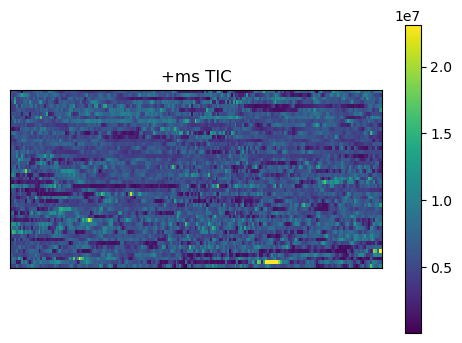

<Figure size 640x480 with 0 Axes>

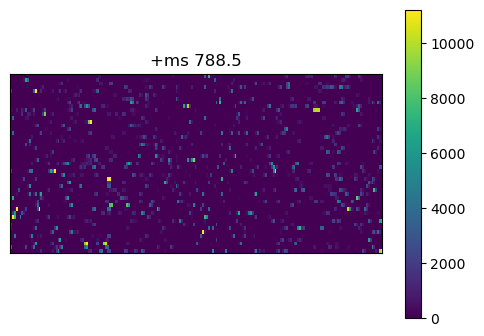

<Figure size 640x480 with 0 Axes>

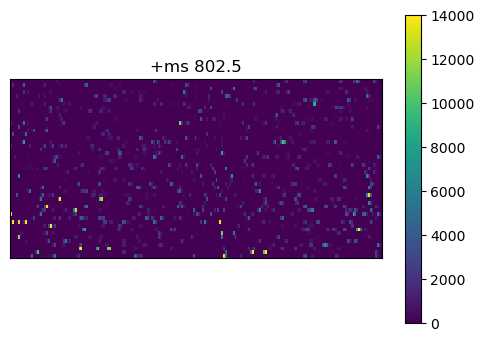

<Figure size 640x480 with 0 Axes>

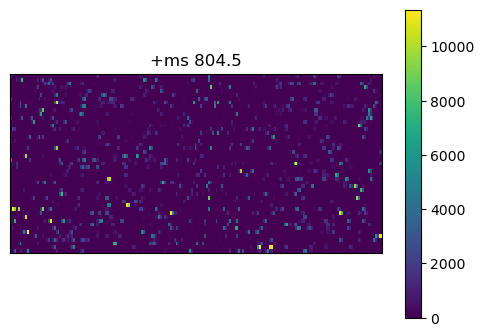

<Figure size 640x480 with 0 Axes>

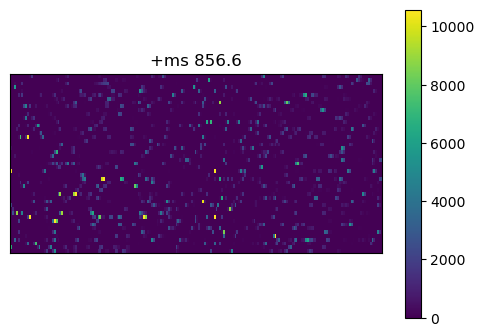

<Figure size 640x480 with 0 Axes>

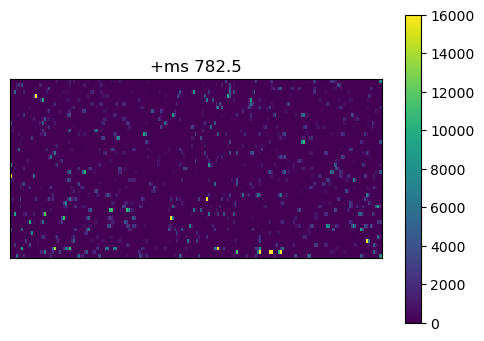

<Figure size 640x480 with 0 Axes>

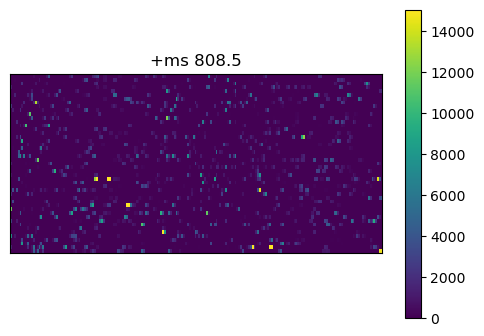

<Figure size 640x480 with 0 Axes>

In [6]:
# show or save full scan imgs
show_all_full_ms_imgs(imgs_raw_fullscans, filters_info_fullscans, mzsPerFilter, scale, aspect, cmap, savefig, OutputDir)

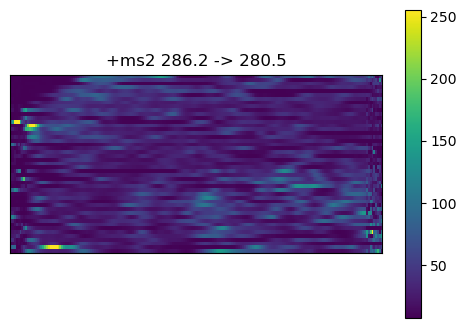

<Figure size 640x480 with 0 Axes>

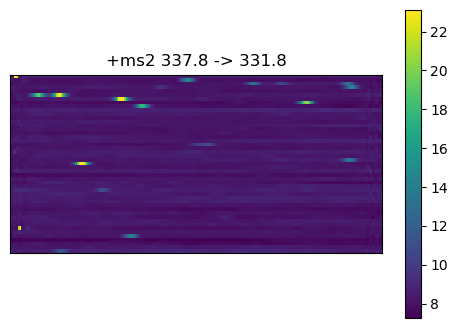

<Figure size 640x480 with 0 Axes>

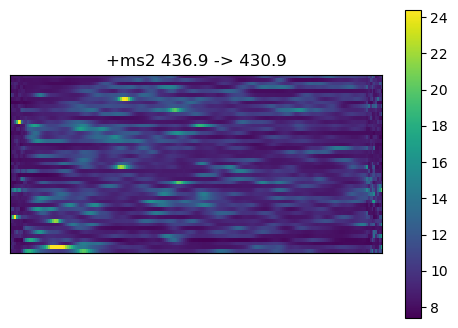

<Figure size 640x480 with 0 Axes>

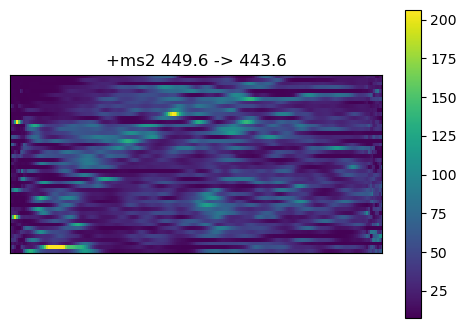

<Figure size 640x480 with 0 Axes>

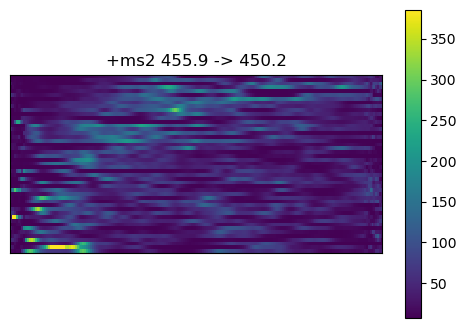

<Figure size 640x480 with 0 Axes>

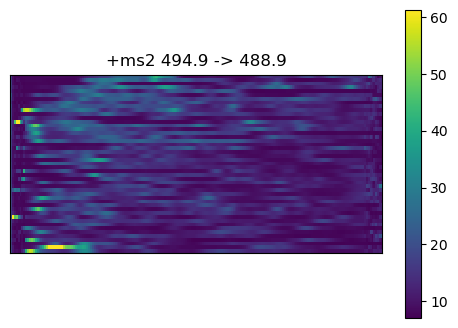

<Figure size 640x480 with 0 Axes>

In [7]:
# show or save MRM imgs
show_all_mrm_imgs(imgs_raw_mrm, filters_info_mrm, mzsPerFilter, scale, aspect, cmap, savefig, OutputDir)